In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# GP limit

In [ ]:
def Z_NGP(y, beta = 1, lambda_p = 0):
  'returns the finite forst order correction of Z'
  return 2 / (np.sqrt(beta) * ((2 * beta + 1) * lambda_p + 2))* beta/np.sqrt(2*np.pi) * np.exp(-beta * y**2/2)*(1 +lambda_p/2* (1+2*beta**2 *y**2))

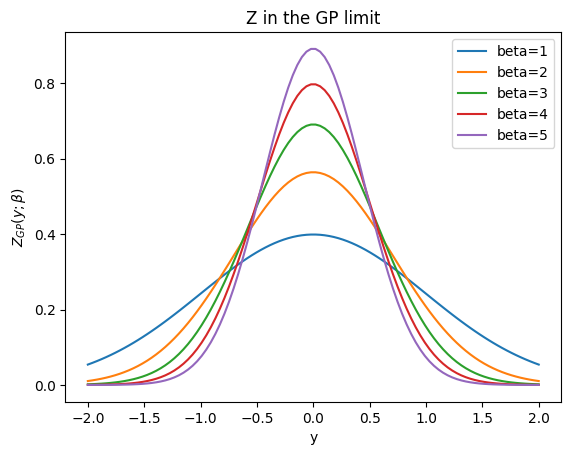

In [ ]:
y = np.linspace(-2,2,100)
for beta in [1, 2, 3, 4, 5]:
  plt.plot(y, Z_NGP(y, beta = beta, lambda_p=0),label=f'beta={beta}')
plt.title(f'Z in the GP limit')
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$Z_{GP}(y;\beta)$')
plt.savefig('Z_GP.png')
plt.show()

In [ ]:
def E_GP(y, beta = 1, lambda_p = 0):
  return (y**2/2)

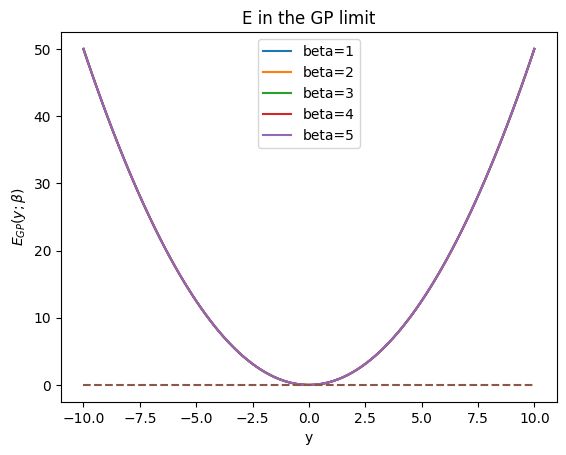

In [ ]:
y = np.linspace(-10,10,100)
for beta in [1, 2, 3, 4, 5]:
  plt.plot(y, E_GP(y, beta = beta, lambda_p=0),label=f'beta={beta}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(f'E in the GP limit')
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$E_{GP}(y;\beta)$')
plt.savefig('E_GP.png')
plt.show()

# Finite width corrections

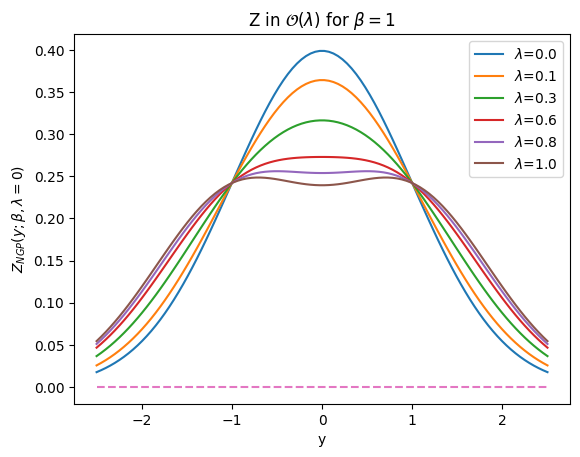

In [ ]:
y = np.linspace(-2.5,2.5,100)
beta=1
for lambda_p in [0.0, 0.1, 0.3, 0.6, 0.8, 1.0]:
  plt.plot(y, Z_NGP(y, lambda_p = lambda_p, beta=beta),label=f'$\lambda$={lambda_p}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(r'Z in $\mathcal{O}(\lambda)$ for $\beta=$'+str(beta))
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$Z_{NGP}(y;\beta, \lambda=0)$')
plt.savefig('Z_NGP.png')
plt.show()

In [ ]:
def E_NGP(y, beta=1, lambda_p=0):
  '''Returns the Energy for finite width, non-linear first order corretion in width'''
  return  ((y**2 * (2 * y**2 * lambda_p * beta**2 - 8 * lambda_p * beta + lambda_p + 2)) / (2 * (2 * y**2 * lambda_p * beta**2 + lambda_p + 2)))

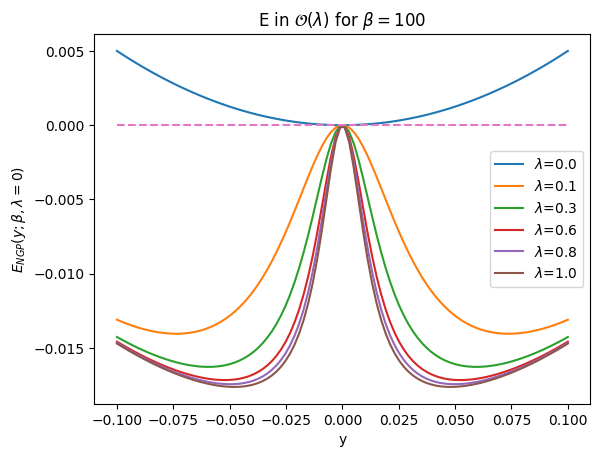

In [ ]:
y = np.linspace(-.1,.1,100)
beta=100
for lambda_p in [0.0, 0.1, 0.3, 0.6, 0.8, 1.0]:
  plt.plot(y, E_NGP(y, lambda_p = lambda_p, beta=beta),label=f'$\lambda$={lambda_p}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(r'E in $\mathcal{O}(\lambda)$ for $\beta=$'+str(beta))
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$E_{NGP}(y;\beta, \lambda=0)$')
plt.savefig('E_NGP_HIGH_T.png')
plt.show()

# Non-linear activation

In [ ]:
def Z_g(y, beta = 1, lambda_p = 0, g=0):
  '''Returns the finite width, non-linear first order corretion in width and non-linearity'''
  return (2 / (np.sqrt(beta) * ((2 * beta + 1) * lambda_p + 2))* beta/np.sqrt(2*np.pi) * np.exp(-beta * y**2/2)*(1 +lambda_p/2* (1+2*beta**2 *y**2)))*(1+8*g*(lambda_p**3*(1/8-2*beta**2*y**2+beta**4*y**4+beta**2*y**2)))

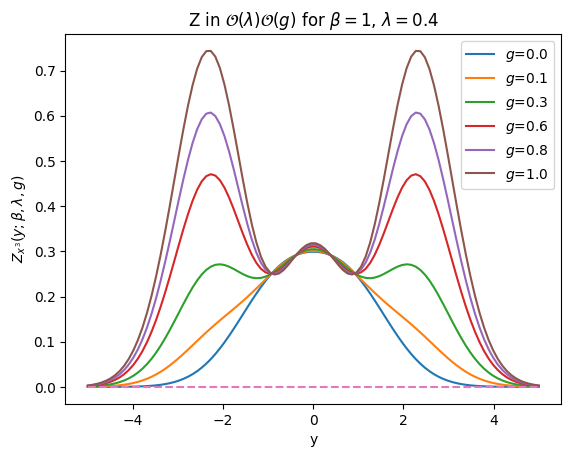

In [ ]:
y = np.linspace(-5,5,100)
beta=1
lambda_p = 0.4
for g_list in [0.0, 0.1, 0.3, 0.6, 0.8, 1.0]:
  plt.plot(y, Z_g(y, g=g_list, lambda_p = lambda_p, beta=beta),label=f'$g$={g_list}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(r'Z in $\mathcal{O}(\lambda)\mathcal{O}(g)$ for $\beta=$'+ str(beta) + r', $\lambda=$' +str(lambda_p))
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$Z_{x^3}(y;\beta, \lambda, g)$')
plt.savefig('Z_NL.png')
plt.show()

In [ ]:
def E_g(y, g=0, beta=1, lambda_p=0):
  # return (-(g * lambda_p**3 * (32 * y**4 * beta**3 - 16 * y**2 * beta)) / (g * lambda_p**3 * (8 * y**4 * beta**4 - 8 * y**2 * beta**2 - 4 * y + 1) + 1) - (4 * y**2 * lambda_p * beta) / (2 * y**2 * lambda_p * beta**2 + lambda_p + 2) + (2 * lambda_p) / (lambda_p * (2 * beta + 1) + 2)  + y**2 / 2)
  return -(g * lambda_p**3 * (32 * y**4 * beta**3 - 16 * y**2 * beta)) / (g * lambda_p**3 * (8 * y**4 * beta**4 - 8 * y**2 * beta**2 + 1) + 1) - (4 * y**2 * lambda_p * beta) / (2 * y**2 * lambda_p * beta**2 + lambda_p + 2) + (2 * lambda_p) / (lambda_p * (2 * beta + 1) + 2) - 1 / (2 * beta) + y**2 / 2

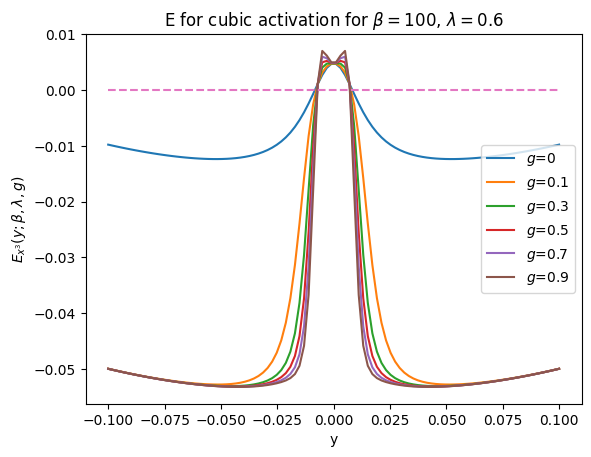

In [ ]:
y = np.linspace(-.1,.1,100)
beta=100
lambda_p = 0.6
for g_list in [0,0.1, 0.3, 0.5, 0.7, 0.9]:
  plt.plot(y, E_g(y, g=g_list, lambda_p = lambda_p, beta=beta),label=f'$g$={g_list}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(r'E for cubic activation for $\beta=$'+ str(beta) + r', $\lambda=$' +str(lambda_p))
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$E_{x^3}(y;\beta, \lambda, g)$')
plt.savefig('E_NL_HIGH_T.png')
plt.show()

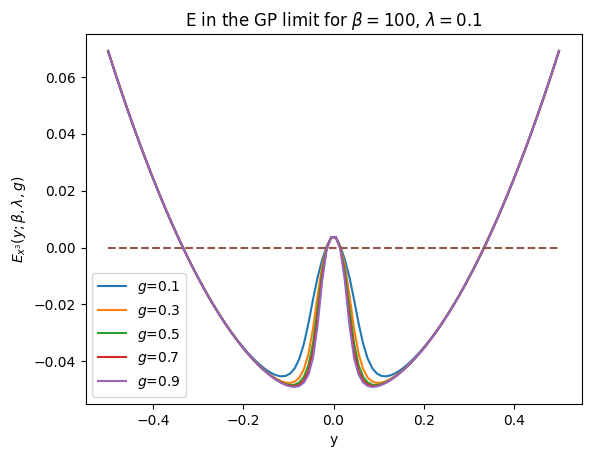

In [ ]:
y = np.linspace(-0.5,0.5,100)
beta=100
lambda_p = 0.1
for g_list in [0.1, 0.3, 0.5, 0.7, 0.9]:
  plt.plot(y, E_g(y, g=g_list, lambda_p = lambda_p, beta=beta),label=f'$g$={g_list}')
plt.plot(y, np.zeros_like(y), '--')
plt.title(r'E in the GP limit for $\beta=$'+ str(beta) + r', $\lambda=$' +str(lambda_p))
plt.legend()
plt.xlabel('y')
plt.ylabel(r'$E_{x^3}(y;\beta, \lambda, g)$')
plt.savefig('E_NL2.png')
plt.show()